In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as py

| Feature                             | Description                                                |
|-------------------------------------|------------------------------------------------------------|
| BALANCE                             | Balance amount left in the account to make purchases       |
| BALANCE_FREQUENCY                   | How frequently the balance is updated (score between 0 and 1; 1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                           | Amount of purchases made from the account                  |
| ONEOFF_PURCHASES                    | Maximum purchase amount done in one-go                     |
| INSTALLMENTS_PURCHASES              | Amount of purchases done in installments                   |
| CASH_ADVANCE                        | Cash in advance given by the user                          |
| PURCHASES_FREQUENCY                 | How frequently purchases are being made (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY          | How frequently purchases are happening in one-go (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASES_INSTALLMENTS_FREQUENCY    | How frequently purchases in installments are being done (score between 0 and 1; 1 = frequently done, 0 = not frequently done) |
| CASH_ADVANCE_FREQUENCY              | How frequently the cash in advance is being paid           |
| CASH_ADVANCE_TRX                    | Number of transactions made with "Cash in Advance"         |
| PURCHASES_TRX                       | Number of purchase transactions made                        |
| CREDIT_LIMIT                        | Limit of credit card for the user                          |
| PAYMENTS                            | Amount of payment done by the user                         |
| MINIMUM_PAYMENTS                    | Minimum amount of payments made by the user                |
| PRC_FULL_PAYMENT                    | Percent of full payment paid by the user                   |
| TENURE                              | Tenure of credit card service for the user                 |


In [3]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)
print(data.shape)
data

(8950, 17)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [4]:
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

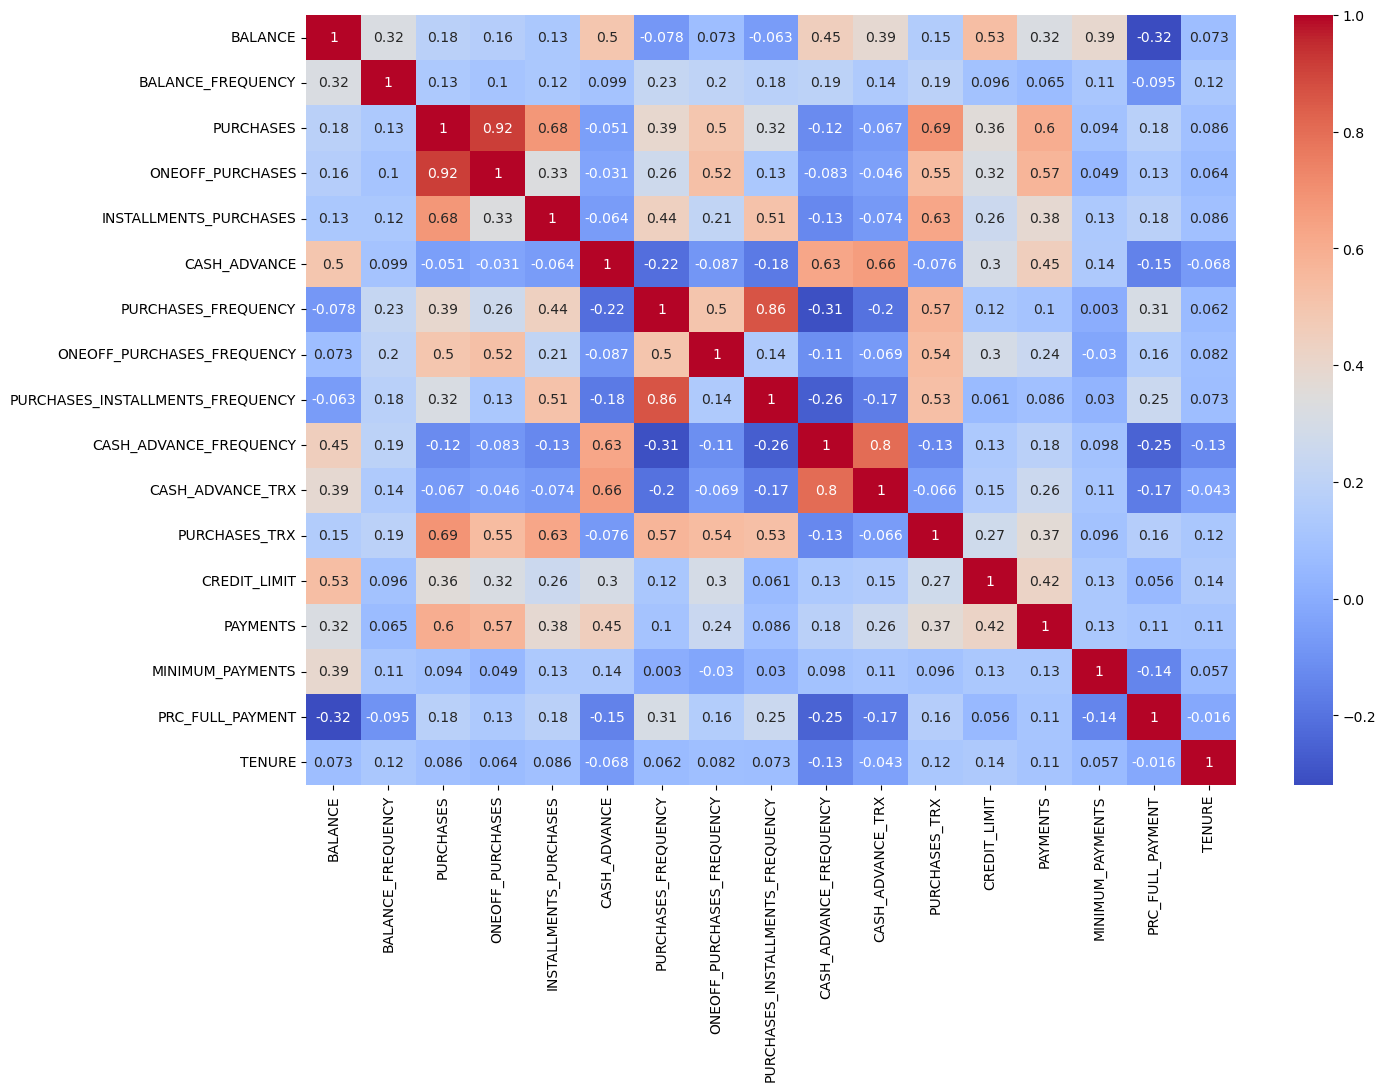

In [5]:
#Correlation matrix to check for multicollinearity not mirrored
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



## 2. Regression Analysis
 


/Users/joao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



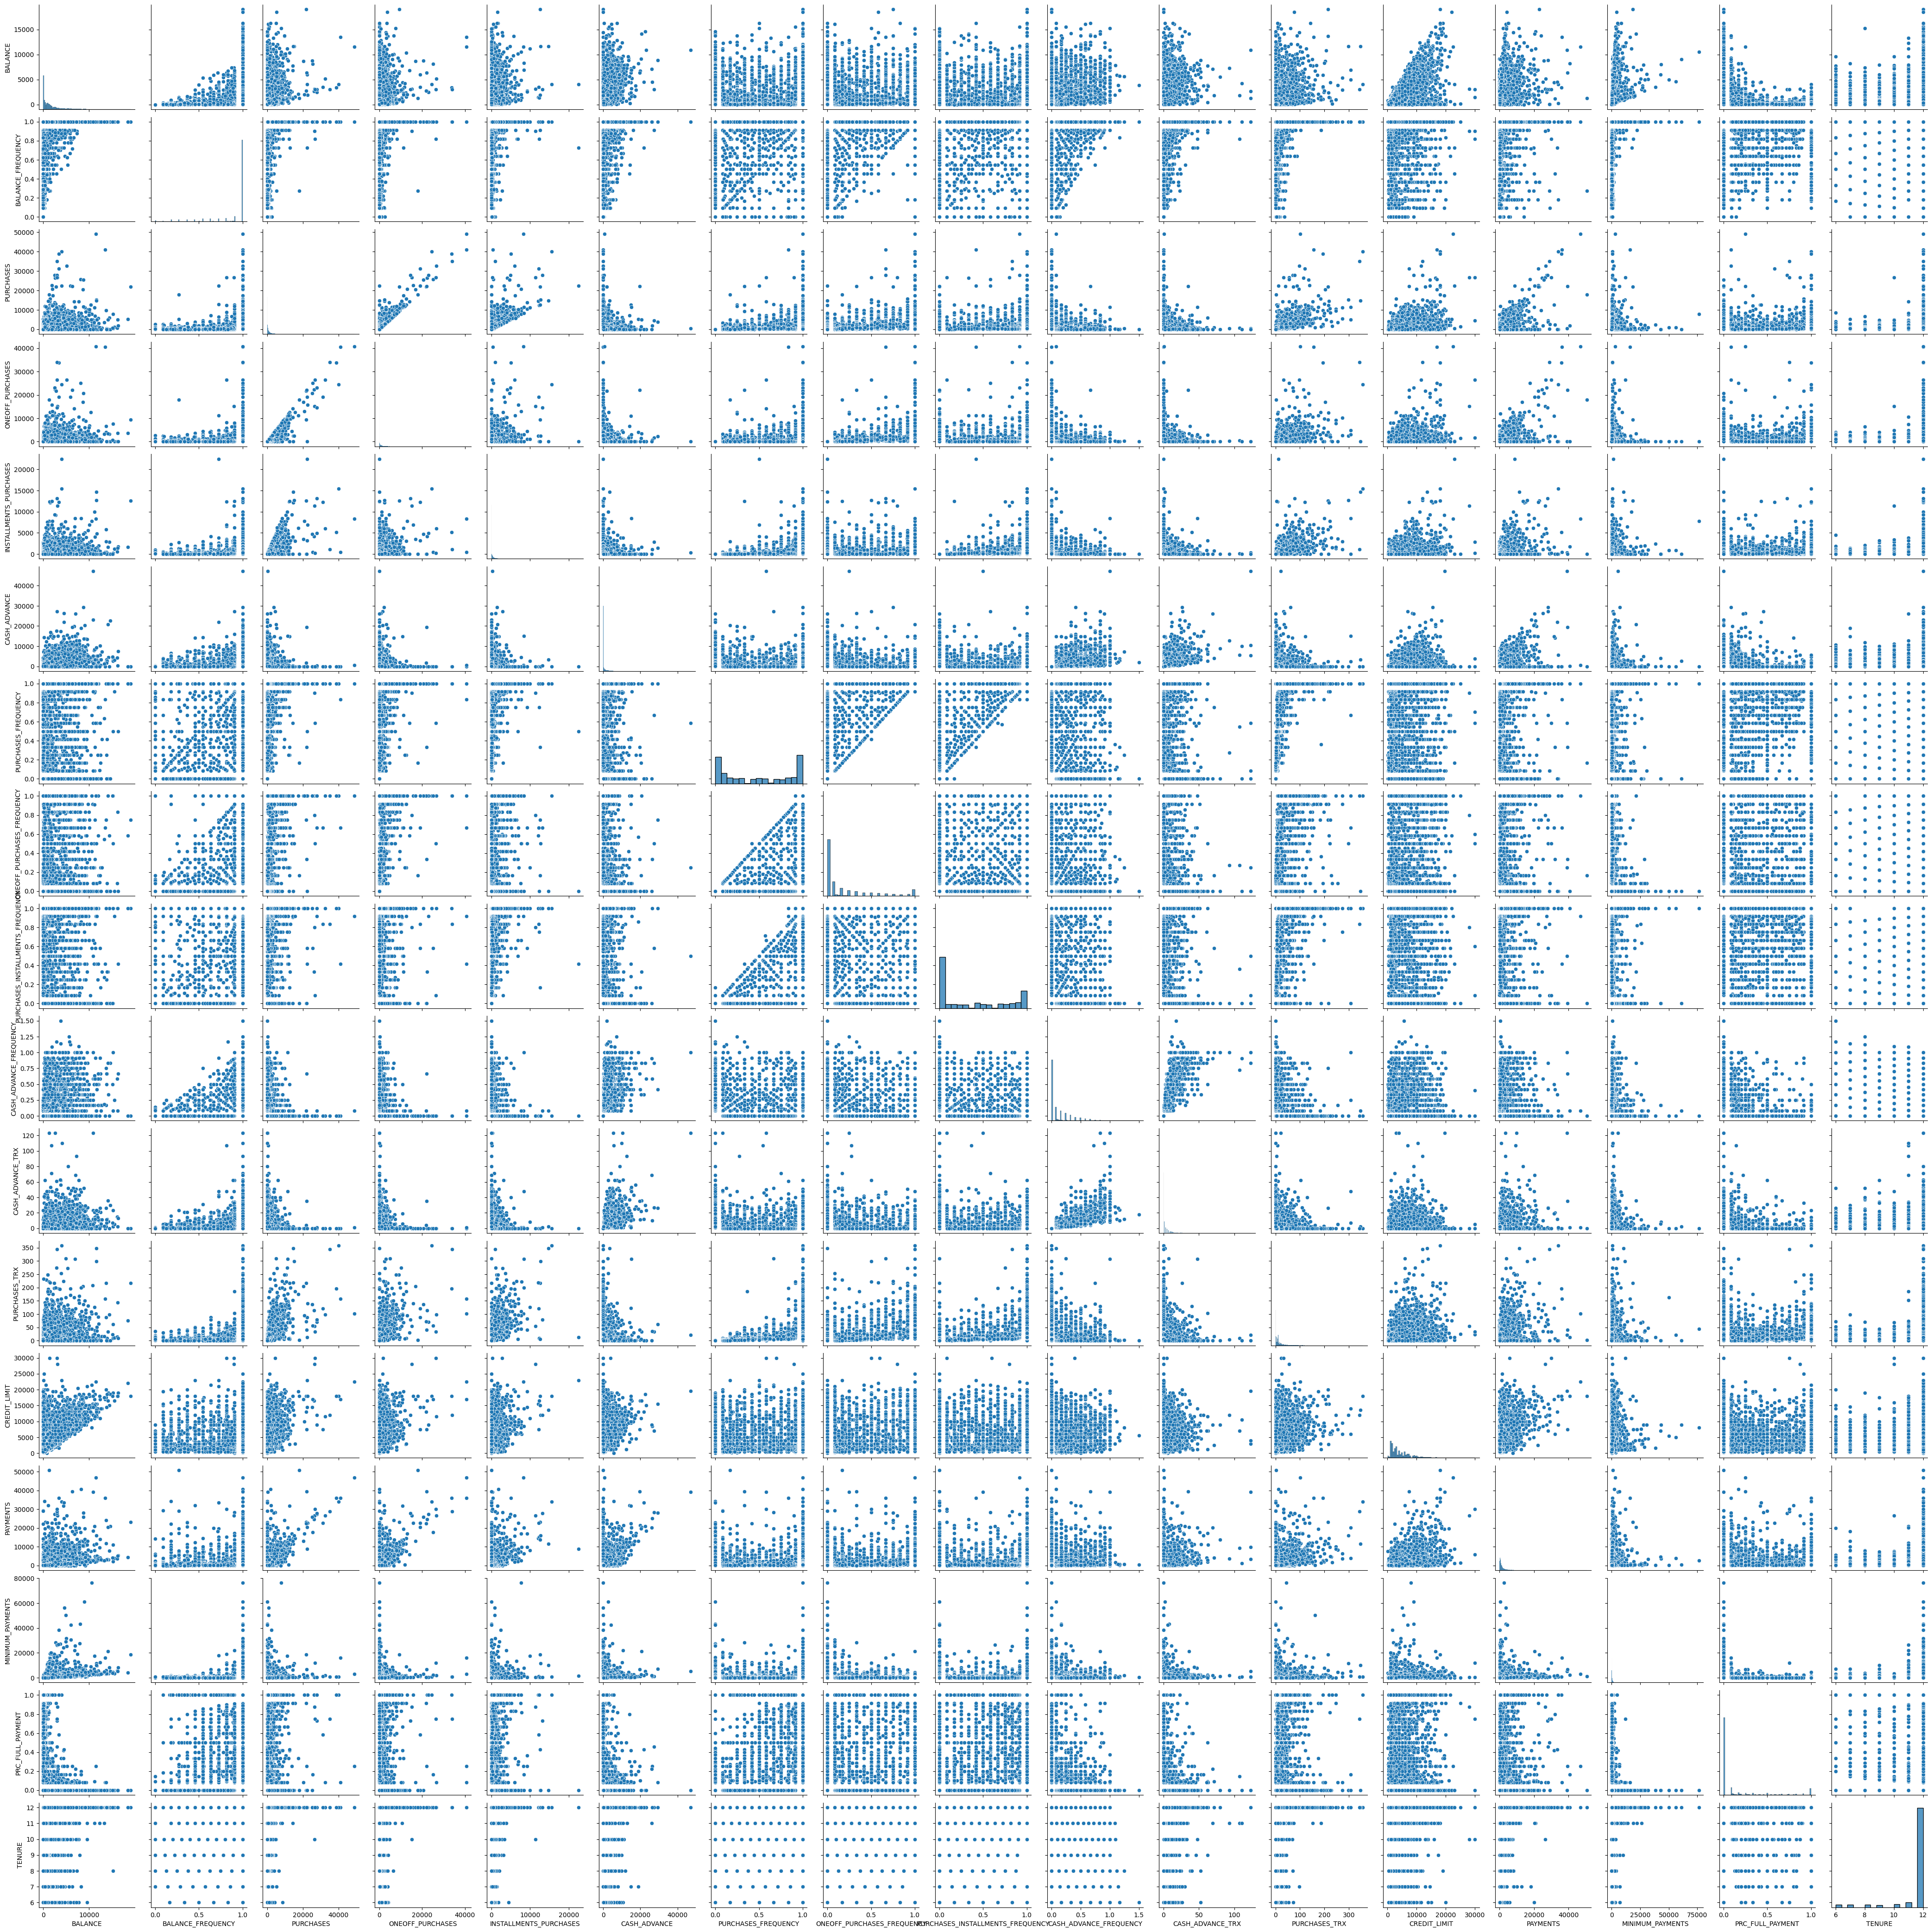

In [6]:
#plot the features against each others with color orange
sns.pairplot(data, plot_kws={})
plt.show()


#### A.Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.


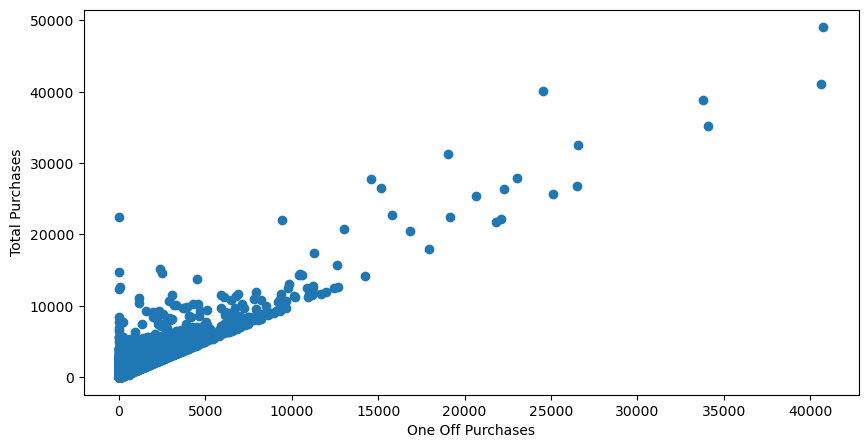

In [110]:
plt.figure(figsize=(10,5))
plt.scatter(data['ONEOFF_PURCHASES'], data['PURCHASES'])  
plt.xlabel('One Off Purchases')
plt.ylabel('Total Purchases')
plt.show()

# Features to be analyzed
X = data[['ONEOFF_PURCHASES']] # Purchases made in one go
y = data['PURCHASES'] # Total purchases



### B. Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized  residuals  from  this  regression.  Does  the  normal  probability  plot  indicate  acceptable normality, or is there any skewness? If a skewness, what is the type of it?

In [111]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

beta = np.linalg.lstsq(X, y)[0]
print('Estimated coefficient:', beta[0])

# Add a column of ones to the feature matrix
ones_vector = np.ones(X.shape[0])
X = np.c_[ones_vector, X]

beta = np.linalg.lstsq(X, y)[0]
beta = np.reshape(beta,(-1,1))

predictions = np.dot(X, beta)



Estimated coefficient: 1.2381684675081208


/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_7516/1660919016.py:5: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_7516/1660919016.py:12: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



[1.00000e+00 6.40263e+03]
773.17


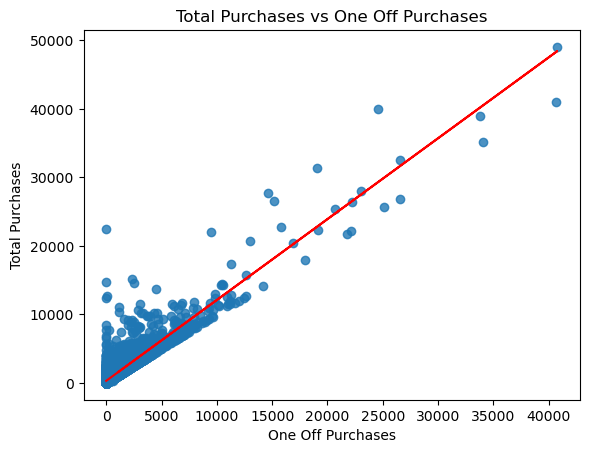

In [119]:
# Plot the data along with the regression line
filtered_X = X[:,1] # Remove the column of ones added earlier
ax = sns.regplot(x=filtered_X, y=y, fit_reg=False)
ax.set(xlabel='One Off Purchases', ylabel='Total Purchases', title='Total Purchases vs One Off Purchases')
plt.plot(filtered_X, predictions, color='red')
plt.show()

In [100]:

mask = y != 0
X_masked = X[mask]
y_masked = y[mask]

Text(0.5, 1.0, 'Q-Q plot')

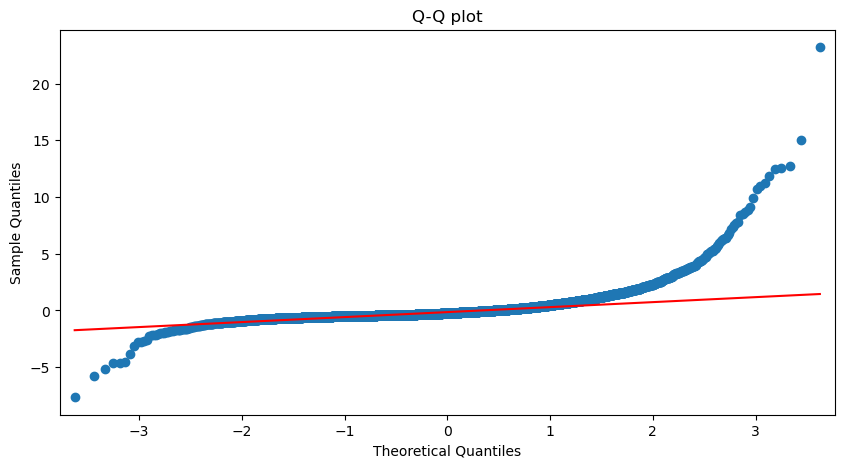

In [103]:
# Normal probability plot of the standardized  residuals  (QQ plot)
import statsmodels.api as sm
import scipy.stats as stats

fig, axs = plt.subplots(ncols=1, # Set the number of columns to split the figure in
                        figsize=(10, 5)) # size of the whole figure

predictions = np.dot(X_masked, beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(X_masked) - X.shape[1]
standardized_residuals = (residuals - np.mean(residuals) )/ np.std(residuals)

sm.qqplot(standardized_residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs)
axs.set_title(label = 'Q-Q plot')



# Falta retirar conclusao da skewness e isso  (do grafico de cima)


### C. Take  the  natural  log  of  both  of  the  variables  and  perform  a  linear  regression  on  the  transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

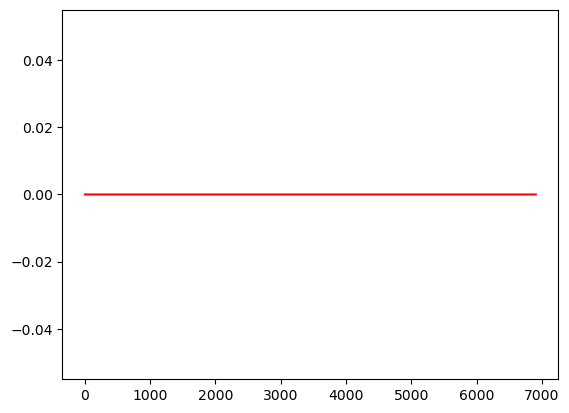

In [25]:
# Residuals and goodness of fit by performing R squared

#Sum of squared total
SST = np.sum((y - np.mean(y))**2)
#Sum of squared residuals
SSR = np.sum((y - predictor[:,0])**2)
#Sum of squared regression ratio
ratio = SSR/SST
#R squared
R_squared = 1 - ratio

print('Sum of squared total:', round(SST,4))
print('Sum of squared residuals:', round(SSR,4))
print('R squared:', np.round(R_squared,2))


Sum of squared total: 40854048102.2345
Sum of squared residuals: 6511974104.5855
R squared: 0.84


In [27]:
from sklearn.metrics import r2_score

print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictor),2))

Coefficient of Determinacy: 0.84


(-3.5, 3.5)

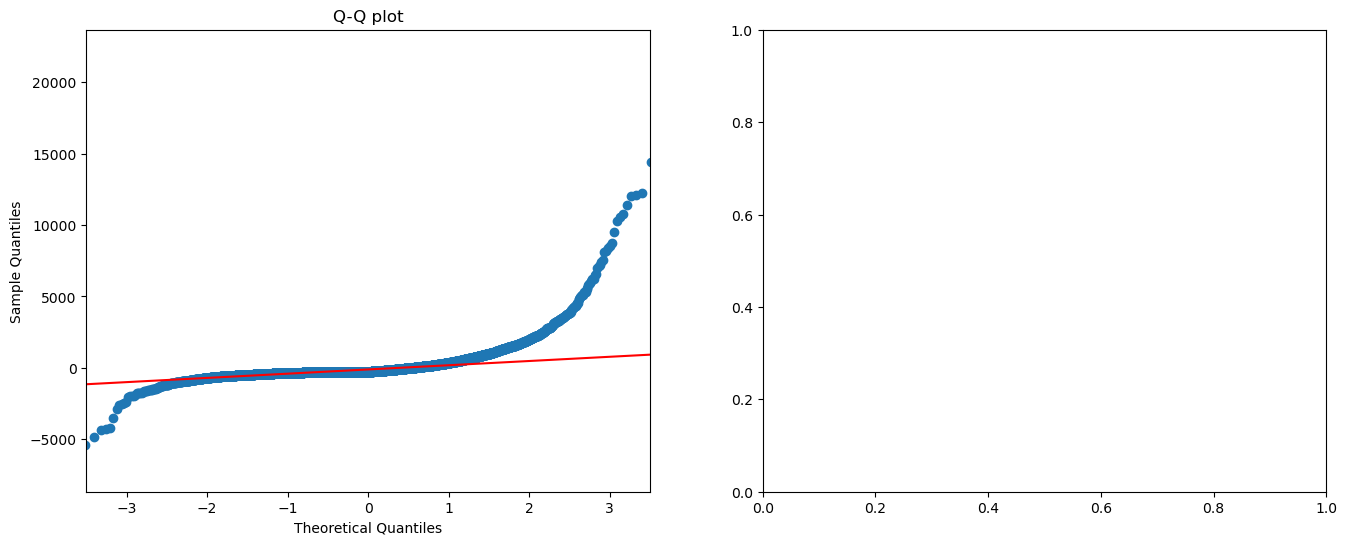

In [112]:
from statsmodels.formula.api import ols


model = sm.OLS(y, X).fit()
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              PURCHASES   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 4.719e+04
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:35:49   Log-Likelihood:                -73101.
No. Observations:                8950   AIC:                         1.462e+05
Df Residuals:                    8948   BIC:                         1.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        304.0237      9.575     31.753      0.0